In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, levene, mannwhitneyu, norm, ks_2samp
import math

In [86]:
did_exercise_df = pd.read_csv("./Completed Datasets/Did Exercise Group.csv")
did_exercise_df.head()

,Date,Daily Weight Change,Calories Group,Exercise Calories Burned,Did Exercise
0,2024-02-05,0.2,2511-2520,593.0,1.0
1,2024-09-11,0.0,2511-2520,469.0,1.0
2,2024-09-02,0.2,2511-2520,645.0,1.0
3,2024-11-09,-0.1,2751-2760,162.0,1.0
4,2024-10-11,0.2,2751-2760,230.0,1.0


In [87]:
no_exercise_df = pd.read_csv("./Completed Datasets/No Exercise Group.csv")
no_exercise_df.head()

,Date,Daily Weight Change,Calories Group,Exercise Calories Burned,Did Exercise
0,2025-02-18,-0.2,2511-2520,NaN,0.0
1,2025-01-31,0.2,2511-2520,NaN,0.0
2,2024-09-21,-0.3,2511-2520,NaN,0.0
3,2024-10-14,-0.2,2751-2760,NaN,0.0
4,2024-10-06,0.7,2751-2760,NaN,0.0


# Summary Statistics
Summary statistics for both groups

In [88]:
# Summary Statistics for the Did Exercise Group
sample_size = len(did_exercise_df)
mean_weight_change = did_exercise_df["Daily Weight Change"].mean()
median_weight_change = did_exercise_df["Daily Weight Change"].median()
standard_deviation = did_exercise_df["Daily Weight Change"].std()
minimum_and_maximum_values = [did_exercise_df["Daily Weight Change"].min(), did_exercise_df["Daily Weight Change"].max()]
quartiles = [did_exercise_df["Daily Weight Change"].quantile(0.25), did_exercise_df["Daily Weight Change"].quantile(0.75)]
interquartile_range = quartiles[1] - quartiles[0]
print(f"Summary Statistics for the Did Exercise Group:\n{sample_size=}\n{mean_weight_change=}\n{median_weight_change=}\n{standard_deviation=}\n{minimum_and_maximum_values=}\n{quartiles=}\n{interquartile_range=}")

Summary Statistics for the Did Exercise Group:
sample_size=41
mean_weight_change=np.float64(-0.03658536585365766)
median_weight_change=np.float64(0.0)
standard_deviation=np.float64(0.5889635377342894)
minimum_and_maximum_values=[np.float64(-1.7000000000000028), np.float64(1.0)]
quartiles=[np.float64(-0.2000000000000028), np.float64(0.2000000000000028)]
interquartile_range=np.float64(0.4000000000000056)


In [89]:
# Summary Statistics for the No Exercise Group
sample_size = len(no_exercise_df)
mean_weight_change = no_exercise_df["Daily Weight Change"].mean()
median_weight_change = no_exercise_df["Daily Weight Change"].median()
standard_deviation = no_exercise_df["Daily Weight Change"].std()
minimum_and_maximum_values = [no_exercise_df["Daily Weight Change"].min(), no_exercise_df["Daily Weight Change"].max()]
quartiles = [no_exercise_df["Daily Weight Change"].quantile(0.25), no_exercise_df["Daily Weight Change"].quantile(0.75)]
interquartile_range = quartiles[1] - quartiles[0]
print(f"Summary Statistics for the No Exercise Group:\n{sample_size=}\n{mean_weight_change=}\n{median_weight_change=}\n{standard_deviation=}\n{minimum_and_maximum_values=}\n{quartiles=}\n{interquartile_range=}")

Summary Statistics for the No Exercise Group:
sample_size=41
mean_weight_change=np.float64(0.1365853658536584)
median_weight_change=np.float64(-0.0999999999999943)
standard_deviation=np.float64(0.629585616719829)
minimum_and_maximum_values=[np.float64(-1.1999999999999886), np.float64(1.5)]
quartiles=[np.float64(-0.3000000000000042), np.float64(0.5)]
interquartile_range=np.float64(0.8000000000000043)


In [90]:
mean_difference = abs(no_exercise_df["Daily Weight Change"].mean() - did_exercise_df["Daily Weight Change"].mean())
median_difference = abs(no_exercise_df["Daily Weight Change"].median() - did_exercise_df["Daily Weight Change"].median())
noex_std = no_exercise_df["Daily Weight Change"].std()
didex_std = did_exercise_df["Daily Weight Change"].std()
ratio_of_standard_deviations = max(noex_std, didex_std) / min(noex_std, didex_std)

print(f"Key Differences of Summary Statistics:\n{mean_difference=}\n{median_difference=}\n{ratio_of_standard_deviations=}")

Key Differences of Summary Statistics:
mean_difference=np.float64(0.17317073170731606)
median_difference=np.float64(0.0999999999999943)
ratio_of_standard_deviations=np.float64(1.0689721457830998)


# Visualisation

### Histogram

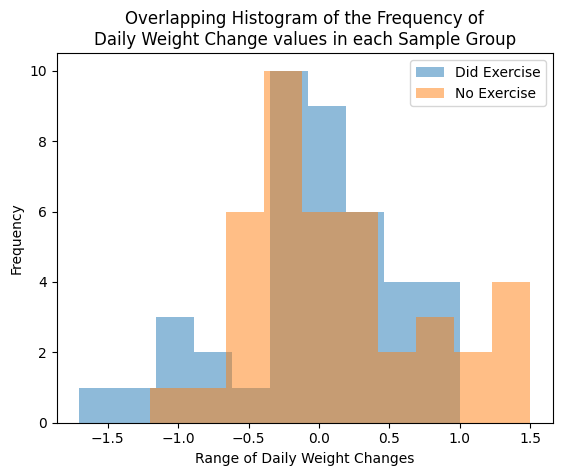

In [91]:
plt.hist(did_exercise_df["Daily Weight Change"], alpha=0.5, label="Did Exercise")
plt.hist(no_exercise_df["Daily Weight Change"], alpha=0.5, label="No Exercise")
plt.title("Overlapping Histogram of the Frequency of\nDaily Weight Change values in each Sample Group")
plt.xlabel("Range of Daily Weight Changes")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.close()

### Box Plots

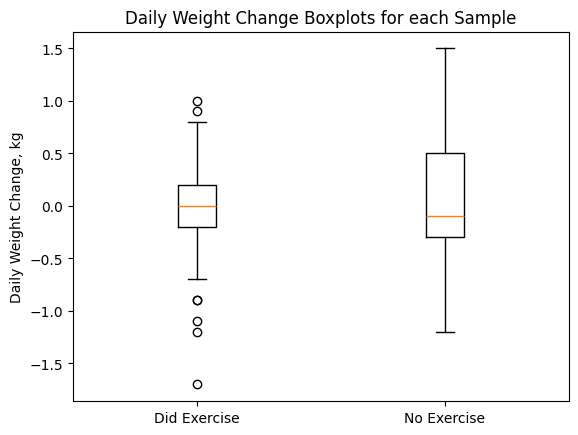

In [92]:
data = [did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"]]
plt.boxplot(data, tick_labels=["Did Exercise", "No Exercise"])
plt.title("Daily Weight Change Boxplots for each Sample")
plt.ylabel("Daily Weight Change, kg")
plt.show()
plt.close()

### Violin Plot

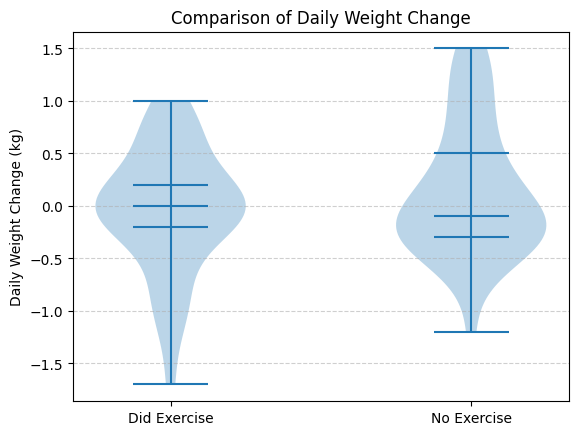

In [93]:
plt.violinplot(data, showmedians=True, quantiles=[[0.25, 0.75], [0.25, 0.75]])

plt.title("Comparison of Daily Weight Change")
plt.ylabel("Daily Weight Change (kg)")
plt.xticks([1, 2], labels=["Did Exercise", "No Exercise"])

plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.show()

# Test for Normality
Using the Shapiro-Wilk Test

In [94]:
# Did Exercise Group
statistic, p = shapiro(did_exercise_df["Daily Weight Change"])
print(f"{statistic=}\n{p=}")
print(f"The data appears to be normally distributed since the W statistic is ~0.95.\nThe p-value of ~0.10 supports" +
      "this conclusion because it is not statistically significant")

statistic=np.float64(0.954894574745304)
p=np.float64(0.10404803976812083)
The data appears to be normally distributed since the W statistic is ~0.95.
The p-value of ~0.10 supportsthis conclusion because it is not statistically significant


In [95]:
# No exercise group
statistic, p = shapiro(no_exercise_df["Daily Weight Change"])
print(f"{statistic=}\n{p=}")
print(f"Since the p-value is below my threshold of 0.05, I can reject the null hypothesis that the data is" +
      " normally distributed.\nBy rejecting it, I acknowledge that there is sufficient evidence to suggest that" +
      " the data in the no exercise sample group is not normally distributed")

statistic=np.float64(0.9231578695482393)
p=np.float64(0.008618190048391278)
Since the p-value is below my threshold of 0.05, I can reject the null hypothesis that the data is normally distributed.
By rejecting it, I acknowledge that there is sufficient evidence to suggest that the data in the no exercise sample group is not normally distributed


The group of records from days where I did exercise is likely to be normally distributed, whereas the group of records where I didn't do any exercise is unlikely to be normally distributed

# Test for Equal Variance

### Levene's Test

In [96]:
statistic, p = levene(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])
print(f"{statistic=}\n{p=}")
print(f"The Levene's test results indicate that the assumption of equal variances across the sample groups " +
      "have been met.\nSince ~0.55 is greater than the 0.05 significance level, I fail to reject the null hypothesis")

statistic=np.float64(0.3669374104156565)
p=np.float64(0.5463931995577435)
The Levene's test results indicate that the assumption of equal variances across the sample groups have been met.
Since ~0.55 is greater than the 0.05 significance level, I fail to reject the null hypothesis


# Hypothesis Testing

### Man-Whitney U Test
Because one of the sample groups is not normally distributed, I have chosen to use the Mann-Whitney U Test. I'm going to use a significance level of a = 0.05

In [97]:
statistic, p = mannwhitneyu(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])
alpha = 0.05
if p < alpha:
    print(f"The test scored {p}. Using a significance level of {alpha}, we can reject the null hypothesis.")
else:
    print(f"The test scored {p}. Using a significance level of {alpha}, we fail to reject the null hypothesis.")

The test scored 0.7557829665720499. Using a significance level of 0.05, we fail to reject the null hypothesis.


Calculating the Critical Value Manually

In [98]:
n1 = len(did_exercise_df)
n2 = len(no_exercise_df)
mean = (n1*n2)/2
std_dev = math.sqrt(( (n1*n2)*(n1+n2+1) )/ 12)
z_score = (statistic - mean) / std_dev
critical_z_value = 2* (1-norm.cdf(abs(z_score)))

print(f"Because the {critical_z_value=} which is higher than our significance level, we fail to reject the null hypothesis")

Because the critical_z_value=np.float64(0.7525213914713231) which is higher than our significance level, we fail to reject the null hypothesis


# Additional Validation

### Distribution Shape and Location Comparison: Two-Sample Kolmogorov-Smirnov Test

In [99]:
stat, p_value = ks_2samp(did_exercise_df["Daily Weight Change"], no_exercise_df["Daily Weight Change"])

if p_value < alpha:
    print(f"With a p_value of {p_value}, we can reject the null hypothesis. The distributions differ")
else:
    print(f"With a p value of {p_value}, we fail to reject the null hypothesis. There is no significant difference")

With a p value of 0.778914912323089, we fail to reject the null hypothesis. There is no significant difference


### Bootstrap Confidence Intervals: Difference in Medians